# Jupyter Notebooks in Chemistry - Package Installation

This notebook installs several Python packages that provide information lookup services as well as visualisation tools that may be particularly relevant to chemistry teaching.

The sorts of functionality provided fall into two main types:

- tools for looking up material properties of compounds and metadata associated with them
- tools for visualising molecular structure.

(Packages also exist for exploring things like orbital structure.)


Typically, we would preinstall these required drawing component packages into a custom environment to be used by module team members, students, or researchers so that they could be used directly and without any further installation requirements.

## Open Babel: The Open Source Chemistry Toolbox

[*Open Babel*](http://openbabel.org/wiki/Main_Page) provides a wide range of tools for working with chemical data. In the python context, its functionality can be accessed using the `pybel` package ([src](https://github.com/openbabel/openbabel/blob/master/scripts/python/pybel.py)). *Note - there is a separate pip package called `pybel` that does something completely different!*

*The following cell may take some time to run whilst the required software is installed. Remove or comment out the `%%capture` line before running the cell to track installation progress. Installation continues whilst the * is displayed, and is replaced by a number when execution is complete.*

In [1]:
%%capture
try:
    import pybel
except:
    !conda install -y -c openbabel openbabel

#SVG to png, pdf etc
!pip install cairosvg

In [2]:
import pybel

A *lingua franca* across many packages for describing molecules and reactions is [SMILES](http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html), the *Simplified Molecular Input Line Entry System*.

The `pybel` package is capable of reading a SMILES string and then rendering a 2D structural model of the molecule specified.

*(SMILES can also represent reactions but `pybel` seems not to render these?)*

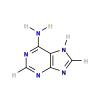

In [3]:
mol = pybel.readstring( "smi","C1=NC2=C(N1)C(=NC=N2)N" )

#Add hydrogens
mol.addh()

#By default, we preview a small SVG output graphic
mol

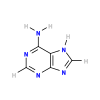

In [4]:
#This is a hack - exploring for now... creating a PNG (can be saved); also supports pdf export
import cairosvg
from IPython.display import Image

try:
    cairosvg.svg2pdf(mol._repr_svg_(), write_to='./images/test/pybelmol.pdf')
except:
    pass

#Convert the SVG to PNG
Image(cairosvg.svg2png(mol._repr_svg_()))

In [5]:
from IPython.display import IFrame
IFrame("./images/test/pybelmol.pdf", width=100, height=200)

We can write out the original *SMILES* description string by specifying the `.write()` output type:

In [6]:
mol.write("smi")
#Seems to add whitespace at end of line?
#Could strip with .strip()

'c1nc2c([nH]1)c(ncn2)N\t\n'

We can also write the molecule out as a flat, 2D rendering of the structure in SVG format, which could also be saved to a file (this actually previews better than the default preview?):

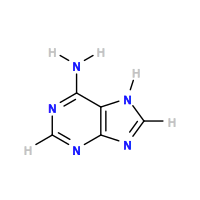

In [7]:
from IPython.display import SVG
SVG(mol.write("svg"))
#Write to a file: mol.write("svg", "outfile.svg")

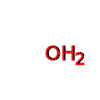

In [8]:
#Can we disable the colour?
pybel.readstring( "smi","O" )

We can create a simple SVG viewer to render a 2D molecule from a *SMILES* as follows:

In [15]:
from IPython.display import display

def smilesSVG(smi, addH=False, bw=False):
    ''' Render molecule structure from SMILES string as SVG. '''
    
    mol = pybel.readstring( "smi",smi )
    if addH: mol.addh()
    conv = pybel.ob.OBConversion()
    conv.SetOutFormat("svg")
    #Optonally, set black and white output
    #The openbabel SVG export formatter has an -xu option which we can pass
    #Via: https://github.com/openbabel/openbabel/issues/1879#issuecomment-411830813
    if bw:
        conv.SetOptions('u', conv.OUTOPTIONS)
    display(SVG(conv.WriteString(mol.OBMol)))
    #display(SVG(mol.write("svg")))
    
#More command line options: https://openbabel.org/docs/dev/FileFormats/SVG_2D_depiction.html
#Would perhaps make sense to be able to pass these too?

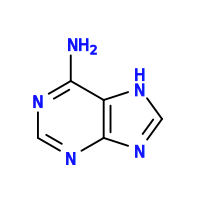

In [16]:
smilesSVG( "C1=NC2=C(N1)C(=NC=N2)N" )

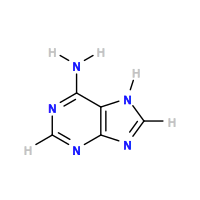

In [17]:
smilesSVG( "C1=NC2=C(N1)C(=NC=N2)N", True )

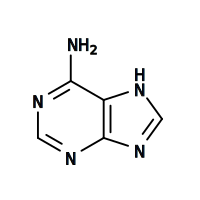

In [25]:
smilesSVG( "C1=NC2=C(N1)C(=NC=N2)N", addH=False, bw=True );

In [10]:
##Generate 3D co-ordinates
#!mkdir -p demos/files
#mol.make3D()
##Write sdf file
#mol

## `py3Dmol`

The `py3Dmol` package provides a Python wrapper around the powerful [`3Dmol.js`](http://3dmol.csb.pitt.edu/doc/index.html) Javascript package and provides a convenient way of rendering three dimensional models of a wide variety of chemical structures, although it looks to be no longer maintained in favour of `nbmolviz`, which also looks to have installed and which raises errors doesn't work when trying to install it on Azure Notebooks. *There also looks to be a [Jupyterlab 3dmol extension](https://github.com/3dmol/jupyterlab_3Dmol), but I haven't tested it yet...*

Compunds can be identified by various identifier schemes (`pdb` and `cid`/PubChem) and geometry schemes, including `sdf`, `mol2`, `xyz`, and `cube`.

In [1]:
%%capture
try: 
    import py3Dmol
except:
    !pip install py3Dmol

In [2]:
import py3Dmol

Let's have a look at the structure of something simple, such as [*ethanol*, (PubChem cid 702](https://pubchem.ncbi.nlm.nih.gov/compound/ethanol)):

In [3]:
p=py3Dmol.view(query='cid:702')
p.setStyle({'stick': {'radius': .1}, 'sphere': {'scale': 0.25}})
p.show();

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [4]:
p=py3Dmol.view(query='cid:702')
p.setStyle({'stick': {'radius': .4}, 'sphere': {'scale': 0.25}})
p.show();

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
#Raw view
py3Dmol.view(query='pdb:1ycr')

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
#Prettified "cartoon" view
p=py3Dmol.view(query='pdb:1ycr')
p.setStyle({'stick': {'radius': .1}, 'sphere': {'scale': 0.25}})
p.show();

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
p.setStyle({'cartoon':{'color':'spectrum'}})
p.show();

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## `pubchempy`

Provides python interface to [PubChem](https://pubchem.ncbi.nlm.nih.gov/), for example to support the lookup of the structure of chemical compounds by chemical name and then report on various properties and descriptive attributes, such as the SMILES representation. (Molecules can also be looked up via their SMILES string.)

`pubchempy` can be used in conjunction with `py3Dmol` to look up a molecule by name (using `pubchempy`) and then display its structure as an interactive 3D model (using `py3Dmol`).

In [17]:
%%capture
try:
    import pubchempy as pcp
except:
    !pip install pubchempy

In [18]:
import pubchempy as pcp

In [19]:
ethanol = pcp.get_compounds('ethanol', 'name')[0]
ethanol.canonical_smiles, ethanol.isomeric_smiles

('CCO', 'CCO')

In [20]:
#Look up by SMILES string
compound = pcp.get_compounds('CCO', 'smiles')[0]
compound.iupac_name

'ethanol'

In [21]:
compound.elements, compound.atoms

(['O', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H'],
 [Atom(1, O),
  Atom(2, C),
  Atom(3, C),
  Atom(4, H),
  Atom(5, H),
  Atom(6, H),
  Atom(7, H),
  Atom(8, H),
  Atom(9, H)])

In [22]:
##For a full list of attributes, see:
#compound.record

In [23]:
compound.molecular_formula

'C2H6O'

In [24]:
compound.molecular_weight

46.069

In [25]:
compound.synonyms[:5]

['ethanol', 'ethyl alcohol', 'alcohol', 'Methylcarbinol', 'grain alcohol']

In [26]:
# pcp.get_compounds seems to return a list, so get the first (only, in many cases?) item
pentanol = pcp.get_compounds('pentanol', 'name')[0]

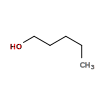

In [27]:
p = pybel.readstring( "smi", pentanol.canonical_smiles )
p

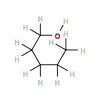

In [28]:
#Add hydrogens
p.addh()
p

We can render a compund retrieved from 

Use the `cid:` selector with `py3Dmol` to specify a PubChem id.

In [29]:
#http://3dmol.csb.pitt.edu/doc/types.html#ColorschemeSpec
p=py3Dmol.view(query='cid:{}'.format(pentanol.cid), width=500,height=400)
p.setStyle({'stick': {'radius': .1}, 'sphere': {'scale': 0.25}})
p.show();

You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## `chembl_webresource_client`

Provides a Python interface to [ChEMBL](https://www.ebi.ac.uk/chembl/) to support the lookup of chemical compounds by common name.

In [30]:
%%capture
try:
    import chembl_webresource_client
except:
    !pip install --upgrade --user chembl_webresource_client

In [31]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
res = molecule.search('aspirin')

for r in res:
    pref_name = r['pref_name']
    if pref_name is not None:
        print(pref_name)

ASPIRIN
ASPIRIN EUGENOL ESTER
LYSINE ACETYLSALICYLATE


In [32]:
aspirin = [r for r in res if r['pref_name']=='ASPIRIN'][0]
aspirin['molecule_synonyms'][:5]

[{'molecule_synonym': '8-Hour Bayer',
  'syn_type': 'TRADE_NAME',
  'synonyms': '8-HOUR BAYER'},
 {'molecule_synonym': 'Acetylsalic Acid',
  'syn_type': 'TRADE_NAME',
  'synonyms': 'ACETYLSALIC ACID'},
 {'molecule_synonym': 'Acetylsalicylic Acid',
  'syn_type': 'ATC',
  'synonyms': 'ACETYLSALICYLIC ACID'},
 {'molecule_synonym': 'Acetylsalicylic Acid',
  'syn_type': 'OTHER',
  'synonyms': 'ACETYLSALICYLIC ACID'},
 {'molecule_synonym': 'Alka Rapid',
  'syn_type': 'TRADE_NAME',
  'synonyms': 'ALKA RAPID'}]

## `pypdb`

`pydb` is a Python API for the [RCSB Protein Data Bank (PDB)](https://www.rcsb.org/pdb/home/home.do).

In [3]:
%%capture
try:
    import pypdb
except:
    !pip install pypdb

In [18]:
#https://github.com/williamgilpin/pypdb/blob/master/demos/demos.ipynb
import pypdb

search_dict = pypdb.make_query('nitroglycerin')
found_pdbs = pypdb.do_search(search_dict)
print(found_pdbs)

['4FQF', '4FR8']


In [19]:
#pypdb.get_info('4FQF')['molDescription']

In [8]:
#Not sure where to find the chemicalID?
#Or how to look up by chemical name?
chem_desc = pypdb.describe_chemical('NAG')
chem_desc

{'describeHet': {'ligandInfo': {'ligand': {'@chemicalID': 'NAG',
    '@molecularWeight': '221.208',
    '@type': 'D-saccharide',
    'InChI': 'InChI=1S/C8H15NO6/c1-3(11)9-5-7(13)6(12)4(2-10)15-8(5)14/h4-8,10,12-14H,2H2,1H3,(H,9,11)/t4-,5-,6-,7-,8-/m1/s1',
    'InChIKey': 'OVRNDRQMDRJTHS-FMDGEEDCSA-N',
    'chemicalName': 'N-ACETYL-D-GLUCOSAMINE',
    'formula': 'C8 H15 N O6',
    'smiles': 'CC(=O)N[C@@H]1[C@H]([C@@H]([C@H](O[C@H]1O)CO)O)O'}}}}

## Material Properties

The [`pymatgen`](http://pymatgen.org/) package provides a range of utilities that support materials analysis.

In [43]:
%%capture
#Building python wheels can take a chunk of time - opt out by disabling the cache
# (This might still take an age to install as it is...)
try:
    import pymatgen
except:
    !pip install --no-cache-dir pymatgen

For example, we can specify an element and then lookup a range of material properties.

In [42]:
import pymatgen as mg

ImportError: No module named 'pymatgen'

In [35]:
si = mg.Element('Si')

si.atomic_mass, si.melting_point, si.boiling_point

(28.0855, 1687.0, 3173.0)

In [59]:
si.is_alkali, si.is_halogen, si.is_lanthanoid, si.is_metalloid, si.is_noble_gas, si.is_quadrupolar, \
    si.is_rare_earth_metal, si.is_transition_metal


(False, False, False, True, False, False, False, False)

In [50]:
si.print_periodic_table()

H                                                                   He 
Li  Be                                          B   C   N   O   F   Ne 
Na  Mg                                          Al  Si  P   S   Cl  Ar 
K   Ca  Sc  Ti  V   Cr  Mn  Fe  Co  Ni  Cu  Zn  Ga  Ge  As  Se  Br  Kr 
Rb  Sr  Y   Zr  Nb  Mo  Tc  Ru  Rh  Pd  Ag  Cd  In  Sn  Sb  Te  I   Xe 
Cs  Ba      Hf  Ta  W   Re  Os  Ir  Pt  Au  Hg  Tl  Pb  Bi  Po  At  Rn 
Fr  Ra                                                                 
        La  Ce  Pr  Nd  Pm  Sm  Eu  Gd  Tb  Dy  Ho  Er  Tm  Yb  Lu     
        Ac  Th  Pa  U   Np  Pu  Am  Cm  Bk  Cf  Es  Fm  Md  No  Lr     


In [54]:
si.value, si.row, si.number, si.group

('Si', 3, 14, 14)

In [57]:
si.full_electronic_structure

[(1, 's', 2), (2, 's', 2), (2, 'p', 6), (3, 's', 2), (3, 'p', 2)]

We can also look up properties of compounds:

In [80]:
comp = mg.Composition('Fe2O3')
comp.is_element, comp.weight, comp.num_atoms, comp.elements

(False, 159.6882, 5.0, [Element O, Element Fe])

In [79]:
comp.formula, comp.alphabetical_formula, comp.reduced_formula, comp.hill_formula, \
comp.element_composition,  comp.reduced_composition

('Fe2 O3', 'Fe2 O3', 'Fe2O3', 'Fe2 O3', Comp: Fe2 O3, Comp: Fe2 O3)

In [78]:
comp.fractional_composition,  comp.get_atomic_fraction('Fe'),  comp.get_atomic_fraction('O')

(Comp: Fe0.4 O0.6, 0.4, 0.6)

In [68]:
comp.total_electrons, comp.weight

(76.0, 159.6882)

Spatial / geometric information is also available. Check out the documentation for more details.

## `chempy`

`chempy` provides a range of utilities that can be used to support the production of examples associated physical, inorganic and analytical chemistry.

In [ ]:
%%capture
#Azure notebooks so slow as to be virtually unusable atm
# Not sure if this installs or not?
# pip install has a requirement on sympy in more recent version than installed version
#   AND the current version can be uninstalled / updated?
!conda install -c bjodah chempy 

In [ ]:
from chempy import Substance
ferricyanide = Substance.from_formula('Fe(CN)6-3')
ferricyanide.composition == {0: -3, 26: 1, 6: 6, 7: 6}  # 0 for charge
ferricyanide.unicode_name

In [ ]:
ferricyanide.latex_name

In [ ]:
ferricyanide.html_name

In [ ]:
ferricyanide.mass

## `RDKit`

In [22]:
%%capture
try:
    import rdkit
except:
    !conda install -y -c rdkit rdkit

In [44]:
%matplotlib inline

In [45]:
from rdkit import Chem
#Following is needed to render molecule structure views in Jupyter notebook
from rdkit.Chem.Draw import IPythonConsole 

In [ ]:
from rdkit.Chem import Draw
mol_str = 'COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C'

m = Chem.MolFromSmiles( mol_str )

try:
    #We can write out the structure to different flavours of image file
    Draw.MolToFile(m,'images/test/cdk2_mol1.o.png')
    Draw.MolToFile(m,'images/test/cdk2_mol1.o.svg')
except:
    pass

png:
![](images/test/cdk2_mol1.o.png)

svg:
![](images/test/cdk2_mol1.o.svg)

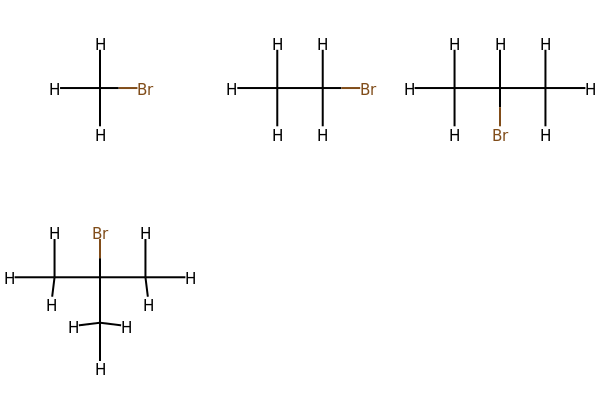

In [35]:
from rdkit.Chem import AllChem

def smilesH(m):
    return AllChem.AddHs(Chem.MolFromSmiles(m))

bromomethane = smilesH('CBr')
bromoethane = smilesH('CCBr')
_2_bromopropane =  smilesH('CC(Br)C')
_2_bromo_2_methylpropane = smilesH('CC(Br)(C)C')

my_molecules = [bromomethane, 
                bromoethane,
                _2_bromopropane,
                _2_bromo_2_methylpropane,
               ]

Draw.MolsToGridImage(my_molecules, useSVG=False)

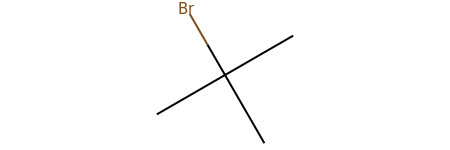

In [67]:
from rdkit.Chem import RemoveHs

RemoveHs(_2_bromo_2_methylpropane)

In [54]:
#Index in to periodic table
periodic_table = AllChem.GetPeriodicTable()
periodic_table.GetElementSymbol(1)

'H'

In [56]:
periodic_table.GetAtomicNumber('Si')

14

In [66]:
periodic_table.GetNOuterElecs('Ar')

8

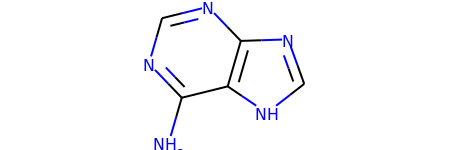

In [63]:
m = Chem.MolFromSmiles("C1=NC2=C(N1)C(=NC=N2)N")
m

[SMARTS](http://www.daylight.com/dayhtml/doc/theory/theory.smarts.html) is an extension of SMILES, with SMILES strings forming a subset of SMARTS strings (?).

Although SMILES strings can represent reactions, these are not handled directly by RDKit, although they are when treated as SMARTS strings.

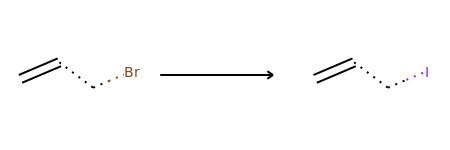

In [77]:
AllChem.ReactionFromSmarts("C=CCBr>>C=CCI")

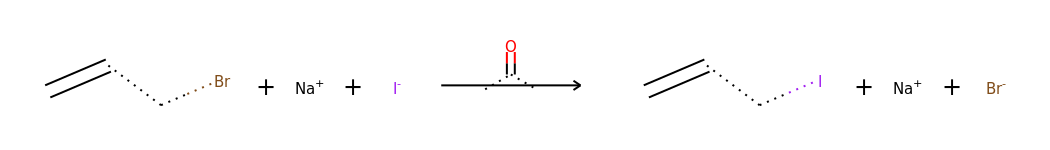

In [75]:
AllChem.ReactionFromSmarts("C=CCBr.[Na+].[I-]>CC(=O)C>C=CCI.[Na+].[Br-]")

An interesting question, pedagogically, is whether the availability of notations for describing reactions, and tools capable of rendering them, can drive the way educational materials are presented. That is, would authors *come to use* a particular diagrammatic convention *if* the tools for automatically creating such diagrams are readily available?

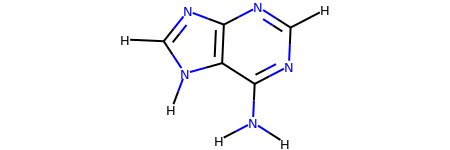

In [64]:
m = AllChem.AddHs(m)
m

In [67]:
#Simplified from: http://rdkit.blogspot.com/2016/07/using-ipywidgets-and-py3dmol-to-browse.html
import py3Dmol
def drawitbase(m,p=None):
        if p is None:
            p = py3Dmol.view(width=400,height=400)
        #p.removeAllModels()
        p.addModel(Chem.MolToMolBlock(m),'sdf')
        p.setStyle({'stick':{}})
        p.setBackgroundColor('0xeeeeee')
        p.zoomTo()
        return p.show()

AllChem.EmbedMultipleConfs(m,useExpTorsionAnglePrefs=True,useBasicKnowledge=True)
drawitbase(m)

You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
#http://nbviewer.jupyter.org/github/greglandrum/rdkit_blog/blob/master/notebooks/Trying%20py3Dmol.ipynb

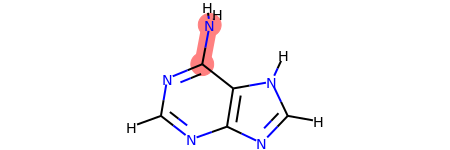

In [70]:
#Highlight a substructure
m.GetSubstructMatch(Chem.MolFromSmiles('C(N)'))
m